In [17]:
import torch
from sebm_mnist.data import load_data
#     from sebm_mnist.objectives import mle
from sebm_mnist.modules.sgld import SGLD_sampler
from sebm_mnist.modules.data_noise import DATA_NOISE_sampler
from sebm_mnist.modules.energy_function import Energy_function

CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:0')
print('torch:', torch.__version__, 'CUDA:', CUDA)
# optimization hyper-parameters
num_epochs = 100
sample_size = 1
batch_size = 10
## model hyper-parameters
D = 2 # data point dimensions
hidden_dim = 400
pixels_dim = 28*28
## EBM hyper-parameters
data_noise_std = 0.01
sgld_num_steps = 20
sgld_step_size = 1
sgld_init_sample_std = 0.1
sgld_noise_std = 0.01
buffer_size = 5000
buffer_percent = 0.95
LOAD_VERSION = 'ebm-v2' 

## data directory
print('Load MNIST dataset...')
DATA_DIR = '/home/hao/Research/sebm_data/'
train_data, test_data = load_data(DATA_DIR, batch_size)

print('Initialize energy function and optimizer...')
ef = Energy_function(pixels_dim, hidden_dim)
if CUDA:
    ef.cuda().to(DEVICE)   
ef.load_state_dict(torch.load('../weights/ef-%s' % LOAD_VERSION))
for p in ef.parameters():
    p.requires_grad = False

print('Initialize SGLD sampler...')
sgld_sampler = SGLD_sampler(sgld_init_sample_std, sgld_noise_std, CUDA, DEVICE)

print('Initialize data noise sampler...')
data_noise_sampler = DATA_NOISE_sampler(data_noise_std, CUDA, DEVICE)
#     data_noise_sampler = None

torch: 1.3.0 CUDA: True
Load MNIST dataset...
Initialize energy function and optimizer...
Initialize SGLD sampler...
Initialize data noise sampler...


In [6]:
%matplotlib inline
for (images, _) in train_data:
    break
images.shape

torch.Size([10, 1, 28, 28])

In [56]:
ebm_images = sgld_sampler.sgld_update(ef=ef, sample_size=sample_size, batch_size=1, pixels_size=784, num_steps=1000, step_size=2)
ebm_images = ebm_images.squeeze(1).cpu().view(10, 28, 28)
ebm_images = ebm_images * 0.5 + 0.5

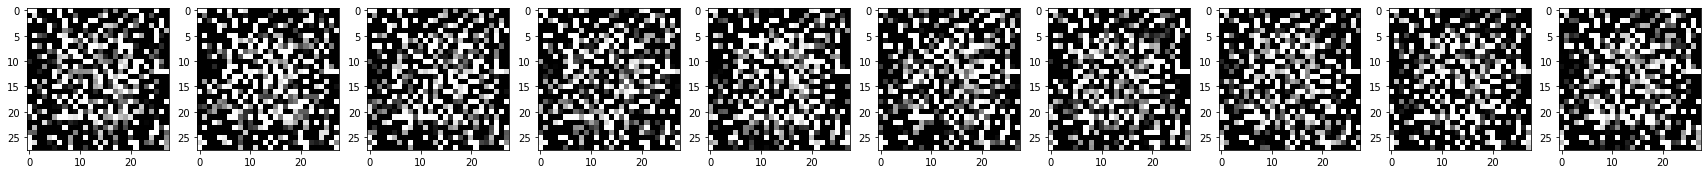

In [57]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 3))
for i in range(sample_size):
    ax = fig.add_subplot(1, 10 ,i+1)
    ax.imshow(ebm_images[i], cmap='gray', vmin=0, vmax=1.0)

In [37]:
ebm_images.max()

tensor(0.7190)